In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=95f41b23f81a16b0e7a7d06dee63b192828834d38ed14911c24d283bad879579
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import os
import numpy as np
import pandas as pd
import wget
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


#Clean dataset balita umur 0-24 tahun

In [3]:

url = 'https://github.com/StuntShield/StuntShield-Stunting-Prediction-Model/raw/main/dataset/data_ideal_024_balita.zip'

filename = wget.download(url, './data_ideal_024_balita.zip')

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./data_ideal_024_balita')

In [4]:
data_024 = pd.read_csv('./data_ideal_024_balita/data-ideal-024-balita.csv')
data_024

,Jenis Kelamin,Tinggi Badan (cm),Berat Badan (kg),Status
0,laki-laki,45.0,1.700,severely wasted
1,laki-laki,45.0,1.701,severely wasted
2,laki-laki,45.0,1.702,severely wasted
3,laki-laki,45.0,1.703,severely wasted
4,laki-laki,45.0,1.704,severely wasted
...,...,...,...,...
1521923,perempuan,110.0,24.997,obesitas
1521924,perempuan,110.0,24.998,obesitas
1521925,perempuan,110.0,24.999,obesitas
1521926,perempuan,110.0,25.000,obesitas


In [5]:
data_024.isnull().sum()

Jenis Kelamin        0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Status               0
dtype: int64

In [6]:
data_024.describe()

,Tinggi Badan (cm),Berat Badan (kg)
count,1.521928e+06,1.521928e+06
mean,8.521947e+01,1.233423e+01
std,1.749497e+01,4.842696e+00
min,4.500000e+01,1.700000e+00
25%,7.200000e+01,8.792000e+00
50%,8.800000e+01,1.234800e+01
75%,1.005000e+02,1.576600e+01
max,1.100000e+02,2.500100e+01


In [7]:
data_024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521928 entries, 0 to 1521927
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Jenis Kelamin      1521928 non-null  object 
 1   Tinggi Badan (cm)  1521928 non-null  float64
 2   Berat Badan (kg)   1521928 non-null  float64
 3   Status             1521928 non-null  object 
dtypes: float64(2), object(2)
memory usage: 46.4+ MB


In [8]:
TINGGI_BB_PB_024 = [45.0,45.5,46.0,46.5,47.0,47.5,48.0,48.5,49.0,49.5,50.0,50.5,51.0,51.5,52.0,52.5,53.0,53.5,54.0,54.5,59.0,63.0,55.0,55.5,56.0,56.5,57.0,57.5,58.0,58.5,59.5,60.0,60.5,61.0,61.5,62.0,62.5,63.5,64.0,64.5,65.0,65.5,66.0,66.5,67.0,67.5,68.0,68.5,69.0,69.5,70.0,70.5,71.0,86.5,71.5,72.0,72.5,73.0,73.5,74.0,74.5,75.0,75.5,76.0,76.5,77.0,77.5,78.0,78.5,79.0,79.5,80.0,80.5,81.0,81.5,82.0,82.5,83.0,83.5,84.0,84.5,85.0,85.5,86.0,87.0,87.5,88.0,88.5,89.0,89.5,90.0,90.5,91.0,91.5,92.0,92.5,93.0,93.5,94.0,94.5,95.0,95.5,96.0,96.5,97.0,97.5,98.0,98.5,99.0,99.5,100.0,100.5,101.0,101.5,102.0,102.5,103.0,103.5,104.0,104.5,105.0,105.5,106.0,106.5,107.0,107.5,108.0,108.5,109.0,109.5,110.0]
print(len(TINGGI_BB_PB_024))

131


In [9]:
SDM3_BB_PB_024_LAKI_LAKI =[1.9,1.9,2.0,2.1,2.1,2.2,2.3,2.3,2.4,2.5,2.6,2.7,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.6,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.2,7.3,7.4,7.5,7.6,7.6,7.7,7.8,7.9,7.9,8.0,8.1,8.2,8.2,8.3,8.4,8.5,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13.0,13.2,13.3,13.4,13.5,13.6,13.7,13.8,14.0,14.1,14.2]
print(len(SDM3_BB_PB_024_LAKI_LAKI))

131


In [10]:
SDM3_BB_PB_024_PEREMPUAN = [1.9,2.0,2.0,2.1,2.2,2.2,2.3,2.4,2.4,2.5,2.6,2.7,2.8,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.1,6.2,6.3,6.4,6.5,6.5,6.6,6.7,6.8,6.9,6.9,7.0,7.1,7.1,7.2,7.3,7.4,7.4,7.5,7.6,7.7,7.7,7.8,7.9,8.0,8.1,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.3,12.4,12.5,12.6,12.7,12.8,13.0,13.1,13.2,13.3,13.5,13.6,13.7,13.9,14.0]
print(len(SDM3_BB_PB_024_PEREMPUAN))

131


In [11]:
SDM2_BB_PB_024_LAKI_LAKI=[2.0,2.1,2.2,2.3,2.3,2.4,2.5,2.6,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,4.0,4.1,4.2,4.3,4.5,4.6,4.7,4.8,5.0,5.1,5.2,5.3,5.4,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.3,8.4,8.5,8.6,8.7,8.7,8.8,8.9,9.0,9.1,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13.0,13.2,13.3,13.4,13.5,13.6,13.7,13.9,14.0,14.1,14.2,14.4,14.5,14.6,14.7,14.9,15.0,15.1,15.3,15.4]
print(len(SDM2_BB_PB_024_LAKI_LAKI))


131


In [12]:
SDM2_BB_PB_024_PEREMPUAN =[2.1,2.1,2.2,2.3,2.4,2.4,2.5,2.6,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,6.9,7.0,7.1,7.2,7.3,7.4,7.4,7.5,7.6,7.7,7.8,7.8,7.9,8.0,8.1,8.2,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,13.0,13.1,13.2,13.3,13.5,13.6,13.7,13.8,14.0,14.1,14.3,14.4,14.5,14.7,14.8,15.0,15.1,15.3]
print(len(SDM2_BB_PB_024_PEREMPUAN))


131


In [13]:
SD1_BB_PB_024_LAKI_LAKI=[2.7,2.8,2.9,3.0,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.8,3.9,4.0,4.1,4.2,4.4,4.5,4.7,4.8,5.0,5.1,5.3,5.4,5.6,5.7,5.9,6.1,6.2,6.4,6.5,6.7,6.8,7.0,7.1,7.2,7.4,7.5,7.6,7.8,7.9,8.0,8.2,8.3,8.4,8.5,8.7,8.8,8.9,9.0,9.2,9.3,9.4,9.5,9.6,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.4,12.5,12.6,12.8,12.9,13.0,13.2,13.3,13.4,13.5,13.7,13.8,13.9,14.1,14.2,14.3,14.4,14.6,14.7,14.8,14.9,15.1,15.2,15.3,15.5,15.6,15.7,15.9,16.0,16.2,16.3,16.5,16.6,16.8,16.9,17.1,17.3,17.4,17.6,17.8,17.9,18.1,18.3,18.5,18.6,18.8,19.0,19.2,19.4,19.6,19.8,20.0]
print(len(SD1_BB_PB_024_LAKI_LAKI))


131


In [14]:
SD1_BB_PB_024_PEREMPUAN=[2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.2,4.3,4.4,4.6,4.7,4.8,5.0,5.1,5.3,5.4,5.6,5.7,5.9,6.0,6.2,6.3,6.4,6.6,6.7,6.9,7.0,7.1,7.3,7.4,7.5,7.6,7.8,7.9,8.0,8.1,8.3,8.4,8.5,8.6,8.7,8.8,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.2,11.3,11.4,11.5,11.6,11.8,11.9,12.0,12.1,12.3,12.4,12.6,12.7,12.8,13.0,13.1,13.2,13.4,13.5,13.7,13.8,13.9,14.1,14.2,14.3,14.5,14.6,14.7,14.9,15.0,15.2,15.3,15.4,15.6,15.7,15.9,16.0,16.2,16.3,16.5,16.6,16.8,17.0,17.1,17.3,17.5,17.6,17.8,18.0,18.2,18.4,18.5,18.7,18.9,19.1,19.3,19.5,19.7,20.0,20.2]
print(len(SD1_BB_PB_024_PEREMPUAN))


131


In [15]:
SD2_BB_PB_024_LAKI_LAKI = [3.0,3.1,3.1,3.2,3.3,3.4,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.4,4.5,4.6,4.8,4.9,5.1,5.3,5.4,5.6,5.8,5.9,6.1,6.3,6.4,6.6,6.8,7.0,7.1,7.3,7.4,7.6,7.7,7.9,8.0,8.2,8.3,8.5,8.6,8.7,8.9,9.0,9.2,9.3,9.4,9.6,9.7,9.8,10.0,10.1,10.2,10.4,10.5,10.6,10.8,10.9,11.0,11.2,11.3,11.4,11.5,11.6,11.7,11.9,12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,13.0,13.1,13.2,13.3,13.5,13.6,13.7,13.9,14.0,14.2,14.3,14.5,14.6,14.7,14.9,15.0,15.1,15.3,15.4,15.6,15.7,15.8,16.0,16.1,16.3,16.4,16.5,16.7,16.8,17.0,17.1,17.3,17.5,17.6,17.8,18.0,18.1,18.3,18.5,18.7,18.8,19.0,19.2,19.4,19.6,19.8,20.0,20.2,20.4,20.6,20.8,21.0,21.2,21.4,21.7,21.9]
print(len(SD2_BB_PB_024_LAKI_LAKI))


131


In [16]:
SD2_BB_PB_024_PEREMPUAN = [3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.2,4.3,4.4,4.6,4.7,4.9,5.0,5.2,5.3,5.5,5.7,5.8,6.0,6.1,6.3,6.5,6.6,6.8,6.9,7.1,7.3,7.4,7.6,7.7,7.8,8.0,8.1,8.3,8.4,8.6,8.7,8.8,9.0,9.1,9.2,9.4,9.5,9.6,9.7,9.9,10.0,10.1,10.2,10.3,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.3,12.4,12.5,12.6,12.8,12.9,13.1,13.2,13.3,13.5,13.6,13.8,13.9,14.1,14.2,14.4,14.5,14.7,14.8,15.0,15.1,15.3,15.5,15.6,15.8,15.9,16.1,16.2,16.4,16.5,16.7,16.8,17.0,17.1,17.3,17.5,17.6,17.8,18.0,18.1,18.3,18.5,18.7,18.9,19.0,19.2,19.4,19.6,19.8,20.0,20.2,20.5,20.7,20.9,21.1,21.3,21.6,21.8,22.0,22.3]
print(len(SD2_BB_PB_024_PEREMPUAN))


131


In [17]:
SD3_BB_PB_024_LAKI_LAKI=[3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.2,4.3,4.4,4.5,4.7,4.8,5.0,5.1,5.3,5.4,5.6,5.8,6.0,6.1,6.3,6.5,6.7,6.9,7.1,7.2,7.4,7.6,7.8,8.0,8.1,8.3,8.5,8.6,8.8,8.9,9.1,9.3,9.4,9.6,9.7,9.9,10.0,10.2,10.3,10.5,10.6,10.8,10.9,11.1,11.2,11.3,11.5,11.6,11.8,11.9,12.1,12.2,12.3,12.5,12.6,12.7,12.8,13.0,13.1,13.2,13.3,13.4,13.6,13.7,13.8,13.9,14.0,14.2,14.3,14.4,14.6,14.7,14.9,15.0,15.2,15.3,15.5,15.6,15.8,15.9,16.1,16.2,16.4,16.5,16.7,16.8,17.0,17.1,17.3,17.4,17.6,17.7,17.9,18.0,18.2,18.4,18.5,18.7,18.9,19.1,19.2,19.4,19.6,19.8,20.0,20.2,20.4,20.6,20.8,21.0,21.2,21.5,21.7,21.9,22.1,22.4,22.6,22.8,23.1,23.3,23.6,23.8,24.1]
print(len(SD3_BB_PB_024_LAKI_LAKI))


131


In [18]:
SD3_BB_PB_024_PEREMPUAN = [3.3,3.4,3.5,3.6,3.7,3.8,4.0,4.1,4.2,4.3,4.5,4.6,4.8,4.9,5.1,5.2,5.4,5.5,5.7,5.9,6.1,6.3,6.4,6.6,6.8,7.0,7.1,7.3,7.5,7.7,7.8,8.0,8.2,8.4,8.5,8.7,8.8,9.0,9.1,9.3,9.5,9.6,9.8,9.9,10.0,10.2,10.3,10.5,10.6,10.7,10.9,11.0,11.1,11.3,11.4,11.5,11.7,11.8,11.9,12.0,12.2,12.3,12.4,12.5,12.6,12.8,12.9,13.0,13.1,13.3,13.4,13.5,13.7,13.8,13.9,14.1,14.2,14.4,14.5,14.7,14.9,15.0,15.2,15.4,15.5,15.7,15.9,16.0,16.2,16.4,16.5,16.7,16.9,17.0,17.2,17.4,17.5,17.7,17.9,18.0,18.2,18.4,18.6,18.7,18.9,19.1,19.3,19.5,19.6,19.8,20.0,20.2,20.4,20.6,20.8,21.0,21.3,21.5,21.7,21.9,22.2,22.4,22.6,22.9,23.1,23.4,23.6,23.9,24.2,24.4,24.7]
print(len(SD3_BB_PB_024_PEREMPUAN))

131


## clean kelas severely wasted

### Laki-Laki

In [19]:
for i in range(len(TINGGI_BB_PB_024)):
  severely_wasted = (
      (data_024['Jenis Kelamin'] == 'laki-laki') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      (data_024['Berat Badan (kg)'] >= SDM3_BB_PB_024_LAKI_LAKI[i]) &
      (data_024['Status'] == 'severely wasted')
  )
  data_024 = data_024.drop(data_024[severely_wasted].index)

### Perempuan


In [20]:
for i in range(len(TINGGI_BB_PB_024)):
  severely_wasted = (
      (data_024['Jenis Kelamin'] == 'perempuan') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      (data_024['Berat Badan (kg)'] >= SDM3_BB_PB_024_PEREMPUAN[i]) &
      (data_024['Status'] == 'severely wasted')
  )
  data_024 = data_024.drop(data_024[severely_wasted].index)


## clean kelas wasted

### Laki-Laki


In [21]:
for i in range(len(TINGGI_BB_PB_024)):
  wasted = (
      (data_024['Jenis Kelamin'] == 'laki-laki') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      ((data_024['Berat Badan (kg)'] < SDM3_BB_PB_024_LAKI_LAKI[i]) | (data_024['Berat Badan (kg)'] >= SDM2_BB_PB_024_LAKI_LAKI[i]))&
      (data_024['Status'] == 'wasted')
  )
  data_024 = data_024.drop(data_024[wasted].index)


### Prempuan


In [22]:
for i in range(len(TINGGI_BB_PB_024)):
  wasted = (
      (data_024['Jenis Kelamin'] == 'perempuan') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      ((data_024['Berat Badan (kg)'] < SDM3_BB_PB_024_PEREMPUAN[i]) | (data_024['Berat Badan (kg)'] >= SDM2_BB_PB_024_PEREMPUAN[i]))&
      (data_024['Status'] == 'wasted')
  )
  data_024 = data_024.drop(data_024[wasted].index)


## clean kelas normal


### Laki-Laki

In [23]:
for i in range(len(TINGGI_BB_PB_024)):
  normal = (
      (data_024['Jenis Kelamin'] == 'laki-laki') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      ((data_024['Berat Badan (kg)'] < SDM2_BB_PB_024_LAKI_LAKI[i]) | (data_024['Berat Badan (kg)'] > SD1_BB_PB_024_LAKI_LAKI[i]))&
      (data_024['Status'] == 'normal')
  )
  data_024 = data_024.drop(data_024[normal].index)


### Perempuan

In [24]:
for i in range(len(TINGGI_BB_PB_024)):
  normal = (
      (data_024['Jenis Kelamin'] == 'perempuan') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      ((data_024['Berat Badan (kg)'] < SDM2_BB_PB_024_PEREMPUAN[i]) | (data_024['Berat Badan (kg)'] > SD1_BB_PB_024_PEREMPUAN[i]))&
      (data_024['Status'] == 'normal')
  )
  data_024 = data_024.drop(data_024[normal].index)


## clean kelas beresiko overweight

### Laki-Laki


In [25]:
for i in range(len(TINGGI_BB_PB_024)):
  berisiko_overweight = (
      (data_024['Jenis Kelamin'] == 'laki-laki') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      ((data_024['Berat Badan (kg)'] <= SD1_BB_PB_024_LAKI_LAKI[i]) | (data_024['Berat Badan (kg)'] > SD2_BB_PB_024_LAKI_LAKI[i]))&
      (data_024['Status'] == 'berisiko overweight')
  )
  data_024 = data_024.drop(data_024[berisiko_overweight].index)


### Perempuan

In [26]:
for i in range(len(TINGGI_BB_PB_024)):
  berisiko_overweight = (
      (data_024['Jenis Kelamin'] == 'perempuan') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      ((data_024['Berat Badan (kg)'] <= SD1_BB_PB_024_PEREMPUAN[i]) | (data_024['Berat Badan (kg)'] > SD2_BB_PB_024_PEREMPUAN[i]))&
      (data_024['Status'] == 'berisiko overweight')
  )
  data_024 = data_024.drop(data_024[berisiko_overweight].index)


## clean kelas overweight


### laki-laki


In [27]:
for i in range(len(TINGGI_BB_PB_024)):
  overweight = (
      (data_024['Jenis Kelamin'] == 'laki-laki') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      ((data_024['Berat Badan (kg)'] <= SD2_BB_PB_024_LAKI_LAKI[i]) | (data_024['Berat Badan (kg)'] > SD3_BB_PB_024_LAKI_LAKI[i]))&
      (data_024['Status'] == 'overweight')
  )
  data_024 = data_024.drop(data_024[overweight].index)

### Perempuan


In [28]:
for i in range(len(TINGGI_BB_PB_024)):
  overweight = (
      (data_024['Jenis Kelamin'] == 'perempuan') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      ((data_024['Berat Badan (kg)'] <= SD2_BB_PB_024_PEREMPUAN[i]) | (data_024['Berat Badan (kg)'] > SD3_BB_PB_024_PEREMPUAN[i]))&
      (data_024['Status'] == 'overweight')
  )
  data_024 = data_024.drop(data_024[overweight].index)

## Clean Kelas Obesitas

### laki-laki


In [29]:
for i in range(len(TINGGI_BB_PB_024)):
  obesitas = (
      (data_024['Jenis Kelamin'] == 'laki-laki') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      (data_024['Berat Badan (kg)'] < SD3_BB_PB_024_LAKI_LAKI[i])&
      (data_024['Status'] == 'obesitas')
  )
  data_024 = data_024.drop(data_024[obesitas].index)

### perempuan


In [30]:
for i in range(len(TINGGI_BB_PB_024)):
  obesitas = (
      (data_024['Jenis Kelamin'] == 'perempuan') &
      (data_024['Tinggi Badan (cm)'] == TINGGI_BB_PB_024[i]) &
      (data_024['Berat Badan (kg)'] < SD3_BB_PB_024_PEREMPUAN[i])&
      (data_024['Status'] == 'obesitas')
  )
  data_024 = data_024.drop(data_024[obesitas].index)

In [31]:
data_024.describe()

,Tinggi Badan (cm),Berat Badan (kg)
count,1.520537e+06,1.520537e+06
mean,8.522750e+01,1.233716e+01
std,1.749194e+01,4.841969e+00
min,4.500000e+01,1.700000e+00
25%,7.200000e+01,8.796000e+00
50%,8.800000e+01,1.235100e+01
75%,1.005000e+02,1.576800e+01
max,1.100000e+02,2.500100e+01


In [32]:
data_024.duplicated().sum()


0

In [33]:
data_024.drop_duplicates(inplace=True)

In [34]:
data_024.duplicated().sum()

0

In [35]:
data_024.describe()

,Tinggi Badan (cm),Berat Badan (kg)
count,1.520537e+06,1.520537e+06
mean,8.522750e+01,1.233716e+01
std,1.749194e+01,4.841969e+00
min,4.500000e+01,1.700000e+00
25%,7.200000e+01,8.796000e+00
50%,8.800000e+01,1.235100e+01
75%,1.005000e+02,1.576800e+01
max,1.100000e+02,2.500100e+01


In [36]:
data_024.isnull().sum()

Jenis Kelamin        0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Status               0
dtype: int64

In [37]:
data_024.to_csv('clean_data_ideal_024.csv', index=False)

# Encode Jenis Kelamin dan Status ke number

In [38]:
data_024['Jenis Kelamin'] = data_024['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
data_024['Status'] = data_024['Status'].map({'severely wasted': 0, 'wasted': 1, 'normal': 2, 'berisiko overweight': 3,'overweigh' : 4,'obesitas' : 5})

data_024

,Jenis Kelamin,Tinggi Badan (cm),Berat Badan (kg),Status
0,0,45.0,1.700,0
1,0,45.0,1.701,0
2,0,45.0,1.702,0
3,0,45.0,1.703,0
4,0,45.0,1.704,0
...,...,...,...,...
1521923,1,110.0,24.997,5
1521924,1,110.0,24.998,5
1521925,1,110.0,24.999,5
1521926,1,110.0,25.000,5


In [39]:
data_024.isnull().sum()

Jenis Kelamin        0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Status               0
dtype: int64

#Split Data Train dan Label Da

In [40]:
dt_train_024=data_024.drop('Status', axis=1)

dt_train_024

,Jenis Kelamin,Tinggi Badan (cm),Berat Badan (kg)
0,0,45.0,1.700
1,0,45.0,1.701
2,0,45.0,1.702
3,0,45.0,1.703
4,0,45.0,1.704
...,...,...,...
1521923,1,110.0,24.997
1521924,1,110.0,24.998
1521925,1,110.0,24.999
1521926,1,110.0,25.000


In [41]:
label_train_024 = data_024['Status']

label_train_024

0          0
1          0
2          0
3          0
4          0
          ..
1521923    5
1521924    5
1521925    5
1521926    5
1521927    5
Name: Status, Length: 1520537, dtype: int64

In [42]:
X_train, X_val, y_train, y_val = train_test_split(dt_train_024, label_train_024, test_size=0.2, stratify=label_train_024, random_state=42)

#Callbacks


In [43]:
def lr_scheduler(epoch):
    # Menghitung kecepatan pembelajaran berdasarkan epoch
    return 0.001 * np.exp(-0.1 * epoch)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=10,
    restore_best_weights=True
    )

In [45]:
model= models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(dt_train_024.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_model = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=100,callbacks=[lr_callback,callback])

Epoch 1/100
38014/38014 [==============================] - 117s 3ms/step - loss: 0.4030 - accuracy: 0.8414 - val_loss: 0.2248 - val_accuracy: 0.9159 - lr: 0.0010
Epoch 2/100
38014/38014 [==============================] - 114s 3ms/step - loss: 0.2360 - accuracy: 0.9071 - val_loss: 0.3239 - val_accuracy: 0.8638 - lr: 9.0484e-04
Epoch 3/100
38014/38014 [==============================] - 126s 3ms/step - loss: 0.2022 - accuracy: 0.9197 - val_loss: 0.1728 - val_accuracy: 0.9279 - lr: 8.1873e-04
Epoch 4/100
38014/38014 [==============================] - 121s 3ms/step - loss: 0.1844 - accuracy: 0.9266 - val_loss: 0.2121 - val_accuracy: 0.9073 - lr: 7.4082e-04
Epoch 5/100
38014/38014 [==============================] - 117s 3ms/step - loss: 0.1707 - accuracy: 0.9321 - val_loss: 0.1551 - val_accuracy: 0.9379 - lr: 6.7032e-04
Epoch 6/100
38014/38014 [==============================] - 110s 3ms/step - loss: 0.1594 - accuracy: 0.9362 - val_loss: 0.2006 - val_accuracy: 0.9149 - lr: 6.0653e-04
Epoch 7/

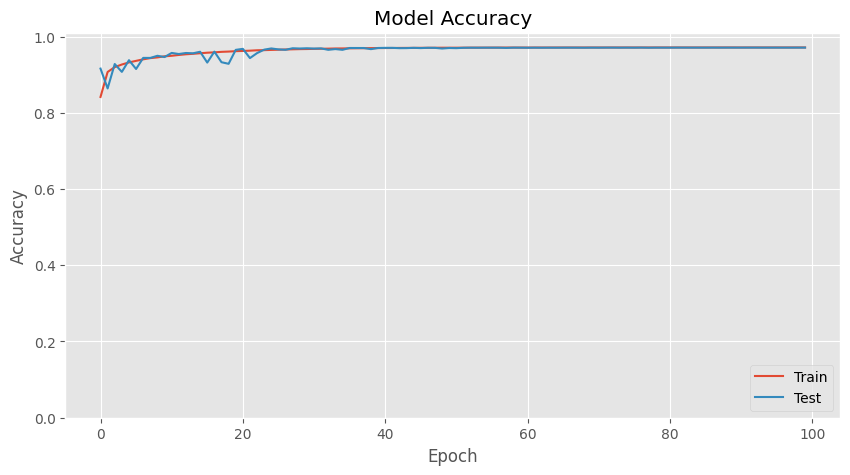

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Model Accuracy')
plt.plot(history_model.history['accuracy'], label='Accuracy')
plt.plot(history_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.01])
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

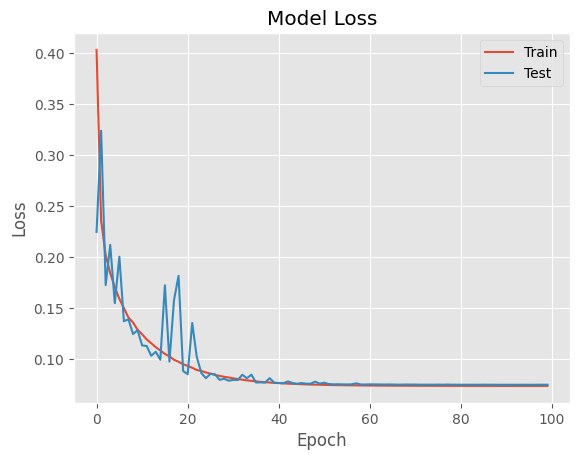

In [47]:
plt.plot(history_model.history['loss'], label='Training Loss')
plt.plot(history_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [49]:
model.save('./models/ideal_prediction_024.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
from google.colab import files

files.download('./models/ideal_prediction_024.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>